# Explaining Gradient Descent Algorithm

**The *Learning* part of a *Machine Learning model*** (at least the Supervised models) **is basically the task of optimizing an appropriate Cost/Loss Function. Though we have many advanced algorithms to achieve the same, the gateway to all those algorithms is the vanilla Gradient Descent! Here, we are trying to understand the logic behind the gradient descent algorithm and we are going to implement it in Python.**

## Theory

The whole idea behind the gradient descent algorithm is the fact that **the gradient of a differentiable function gives us the direction of the greatest ascent. So in order to go downhill, we take the opposite direction (which is -∇). Thus, we will eventually arrive at the point of *minima* (not always!)**. But what is the underlying mathematical logic behind this claim? How do we know it works?

**Note: This is not a proof of convergence of gradient descent algorithm! This theorem is only to explain why we always take steps in the direction of negative gradient.**

<img src="./images/gradient-of-differentiable-function.png">

<img src="./images/gradient-descent-algorithm.png">
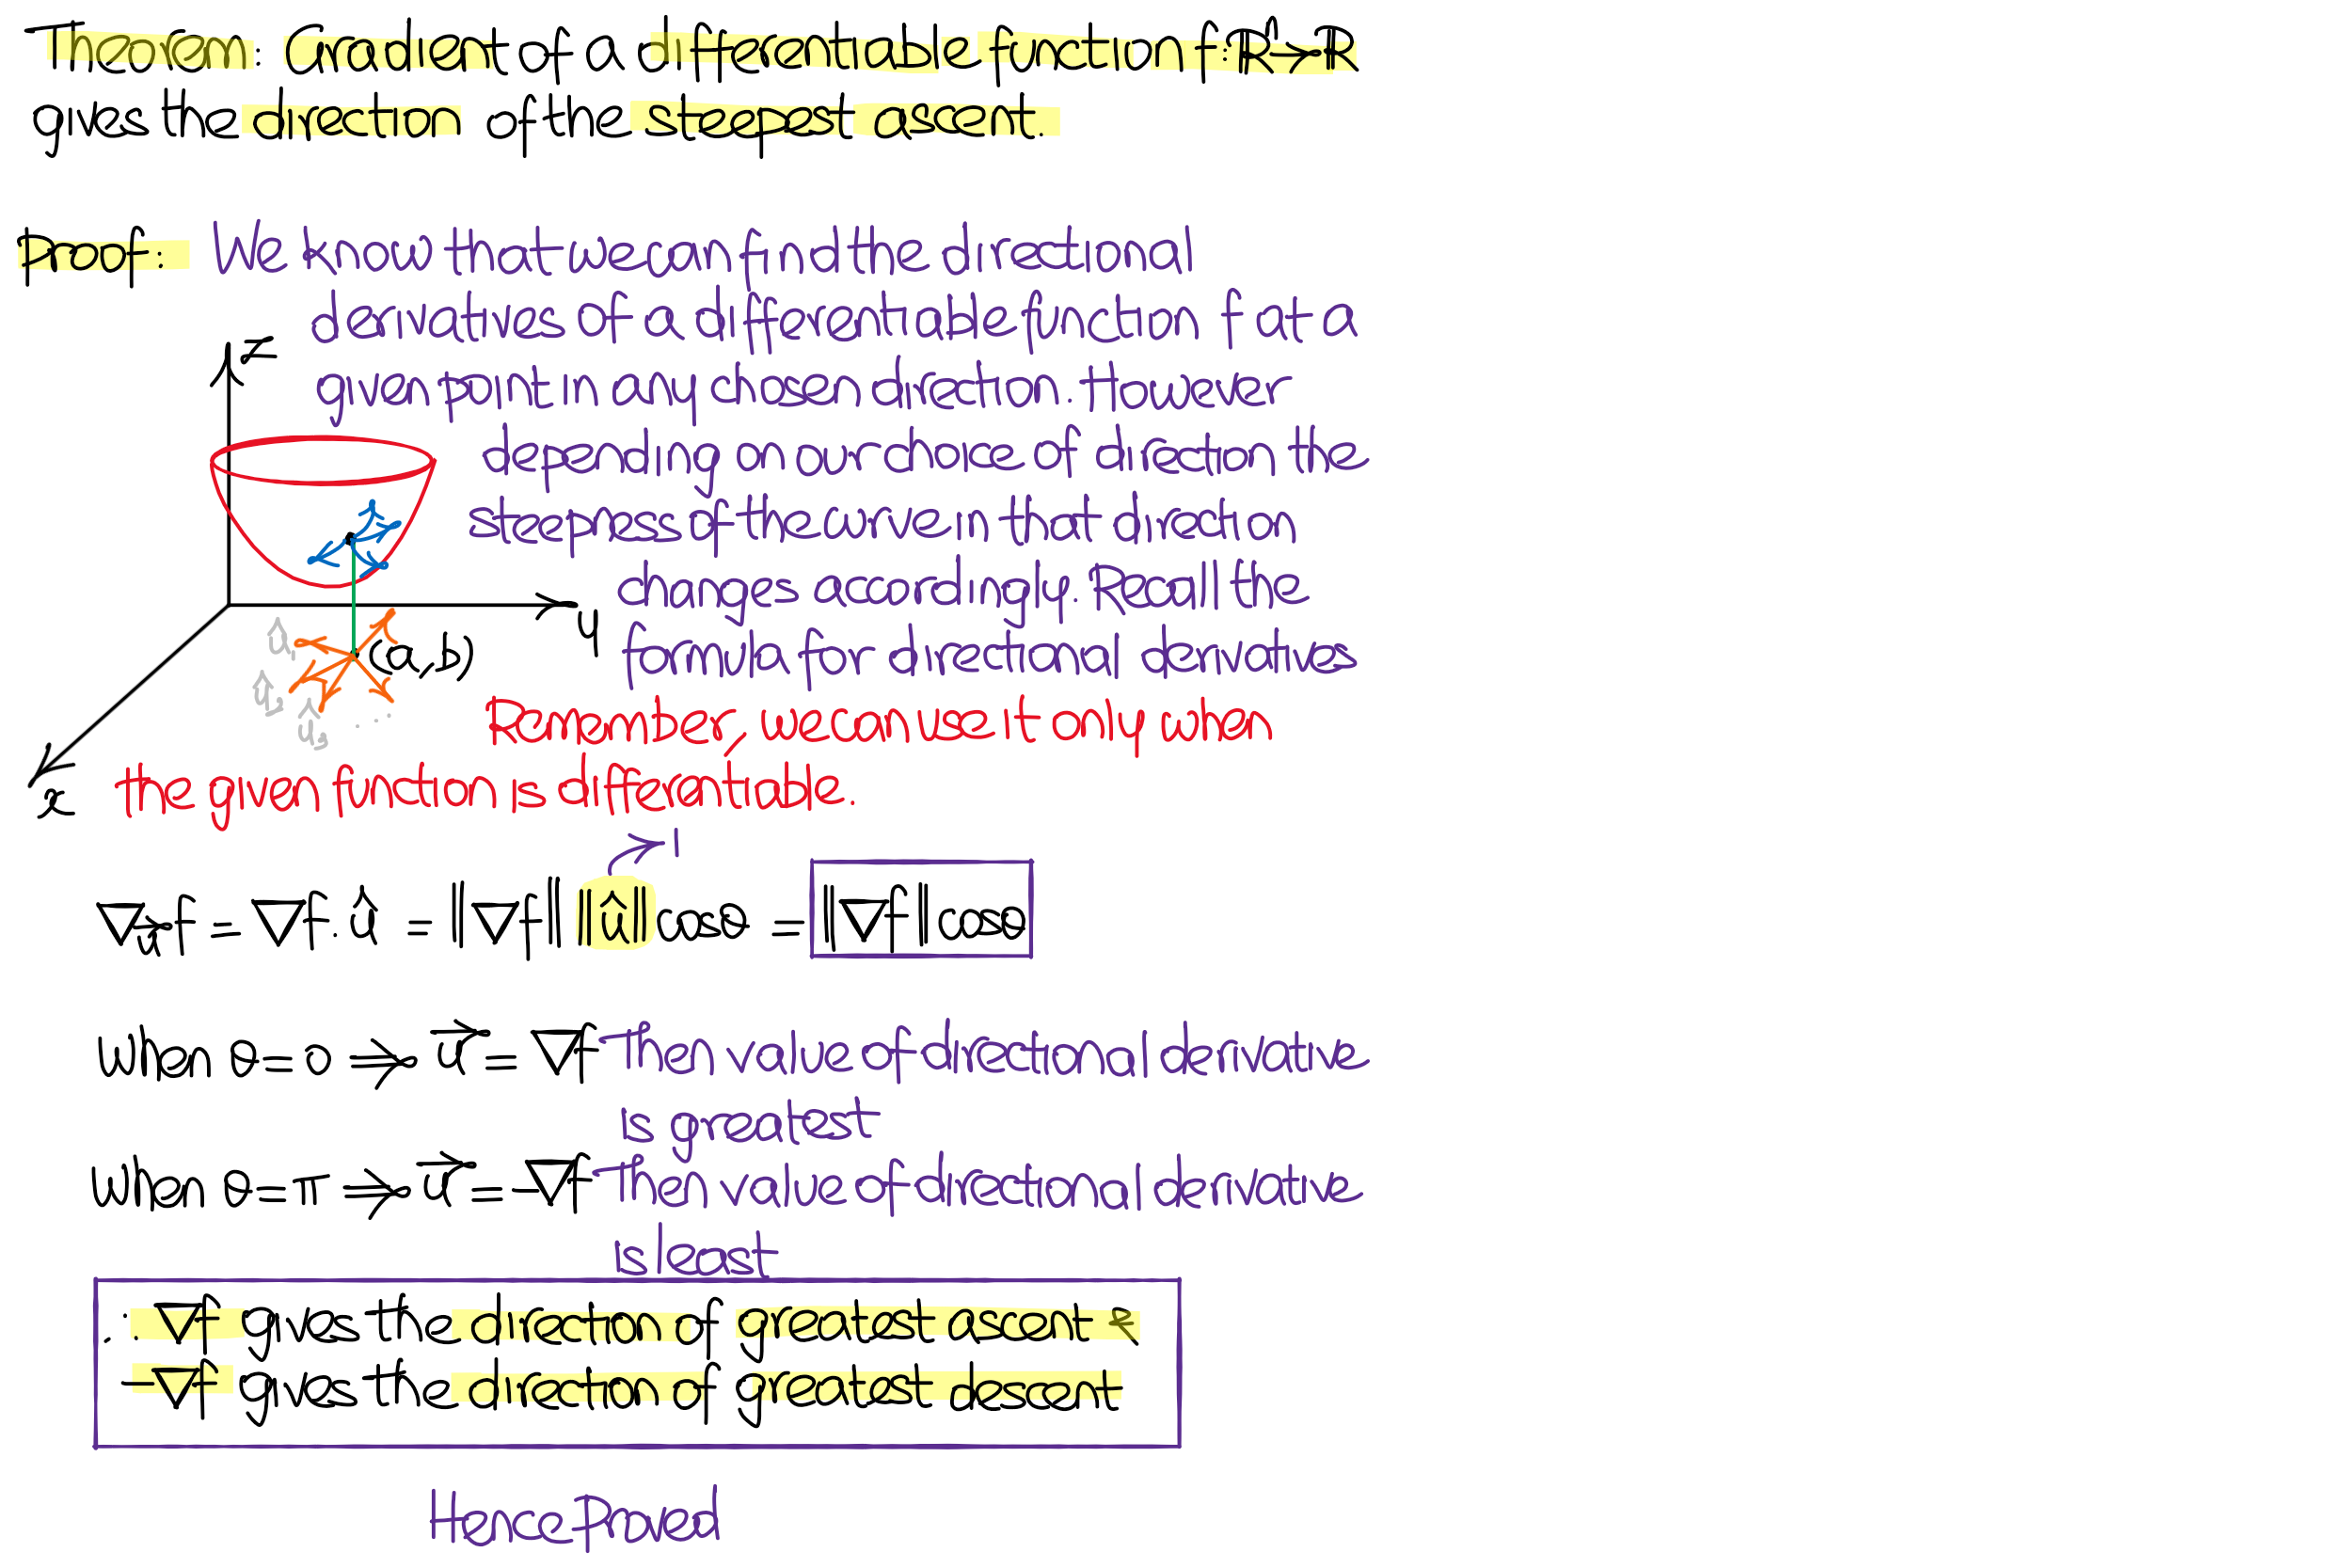

## Implementation

Importing relevant libraries to implement vanilla gradient descent algorithm

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

The following function computes the gradient of the given multivariable function. But we have to get the formula for the gradient analytically.

In [12]:
def gradient(vector):
    x, y = vector
    return np.array([(2*x)-y-1, -x+(2*y)+1])

The following function computes the $L_1norm$ of a vector. $L_1norm$ is chosen over $L_2norm$ just to reduce the computational complexity. We need this function to find the norm of the gradient in every iteration. Because, if the norm of the gradient is zero/negligible, then it is very likely that we are around the point of minima.

In [13]:
def norm(vector):
    x, y = vector
    return abs(x) + abs(y)

Here comes the actual gradient descent algorithm.

There are 3 parameters:

- `start_vector` - where we start, our initial point)
- `learning_rate` - this is a hyperparameter which has great impact on speed & convergence of Gradient Descent
- `stop_condn` - our aim is to converge at a point with **∇f~0**. `stop_condn` is basically how small we want the norm of the gradient to be, in order to be considered as negligible

In [14]:
def gradient_descent(start_vector, learning_rate, stop_condn):
    start_vector = np.array(start_vector)

    while norm(gradient(start_vector)) > stop_condn:
        start_vector = start_vector - learning_rate * gradient(start_vector)

    return start_vector

## Example 1: $f(x,y)=x^2+y^2-xy-x+y-1$

### Goal: To find the point of *minima* of the above function 

Consider the function $f(x,y)=x^2+y^2-xy-x+y-1$. Its gradient at any point is $∇f=<2x-y-1, -x+2y+1$, which is a continuous function. Hence it implies that our function $f$ is differentiable. 

- We know that a function will attain its *extrema* at boundary points or critical points. 
- Here, there are no boundary points as we are trying to optimize the function over the whole $R^2$. 
- Let's focus on critical points:
  - Out of the 2 types of critical points, there is only one type available for this function: it is the point where the gradient is $0$. 
  - Though in this particular example, it is possible to come up with an analytical solution. Let's use the **gradient descent algorithm** to understand how it works!

<img src="./images/gradient-descent-graph.png">
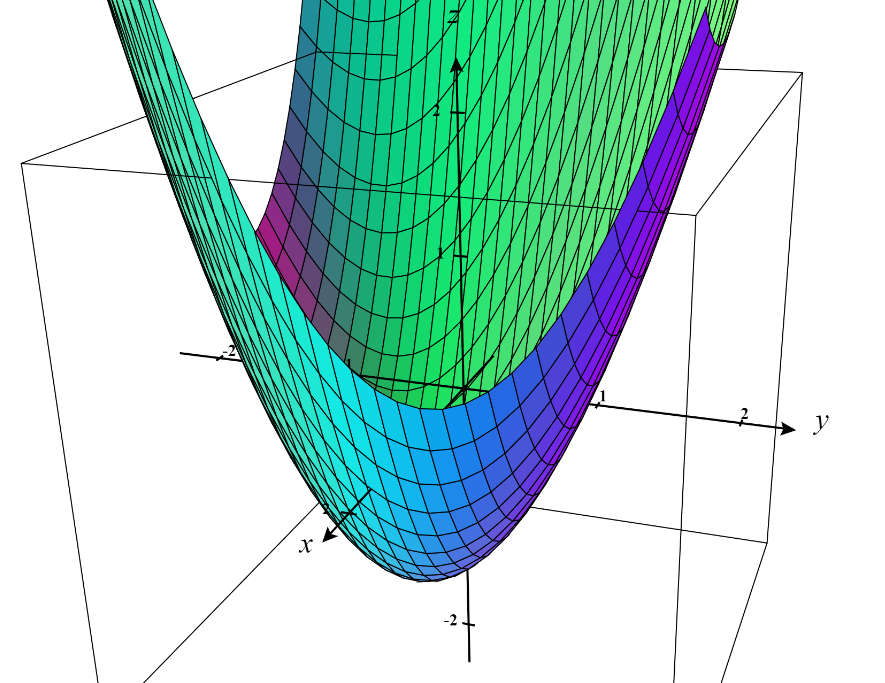

Using multivariable calculus, we can determine that the above function is **strictly convex** with only one point of *minima* at $(\frac{1}{3},-\frac{1}{3})$ and there is no other minima or maxima or saddle points. So, no matter where we start off, our gradient descent algorithm should converge to the aforementioned point. Let's run our code and see if our gradient descent algorithm actually converges to the above point.

In [15]:
gradient_descent((122, 342), 0.1, 10 ** -10)

array([ 0.33333333, -0.33333333])

**The above point $(\frac{1}{3},-\frac{1}{3})$ is the point of minima of the given function**

## Example2: $f(x,y)=\frac{7xy}{e^{(x^2 + y^2)}}$

### Goal: To find the point of minima of the above function 

Consider the function $f(x,y)=\frac{7xy}{e^{(x^2 + y^2)}}$. 

Its gradient at any point is ∇f=7<$\frac{y(1-2x^2)}{e^{(x^2 + y^2)}},\frac{x(1-2y^2)}{e^{(x^2 + y^2)}}>$ which is a continuous function. Hence, it implies that our function $f$ is differentiable. 

- We know that a function will attain its extrema at boundary points or critical points. 
- Here, there are no boundary points as we are trying optimize the function over whole $R^2$. 

Let's focus on critical points: Out of the 2 types of critical points, there is only one type available for this function:

- It is the point where the gradient is $0$. Though in this particular example, it is possible to come up with analytical solution. Let's use the **gradient descent algorithm** to understand how it works!

<img src="./images/gradient-descent-graph-2.png">
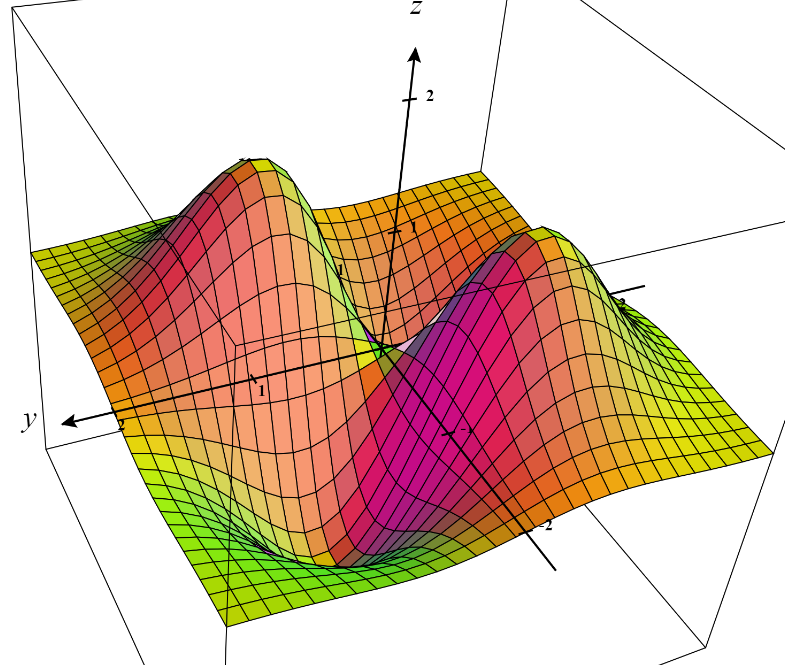

Using multivariable calculus, we can determine that the above function has **minimas** at the points $±(\frac{1}{\sqrt{2}},-\frac{1}{\sqrt{2}})$, two **maximas** at the points $±(\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}})$ and a **saddle** point at the point $(0,0)$. 

So depending on where we start off, our gradient descent algorithm should converge to one of the two minimas or the saddle point. Let's run our code and see if our gradient descent algorithm actually converges to any of the above points. 

**Note:** Though we are using gradient descent algorithm to try to converge towards the point of minima, depending on the starting point, it may converge towards a saddle point or it may stray away from the point of minima and move towards flat or almost flat point on the graph. Particularly in this problem, beyond a certain distance (say 5 units, any direction) from the origin, the surface is going to be almost flat, which our algorithm may wrongly interpret as a point of minima. But under no circumstances, our algorithm will converge to a point of maxima.

In [16]:
# This is the only function which we have to recompute analytically if we use a new cost function 
def gradient(vector):
    x, y = vector
    return 7*np.array([(y*(1-2*(x**2)))/np.exp(x**2+y**2),(x*(1-2*(y**2)))/np.exp(x**2+y**2)])

In [17]:
gradient_descent((0.7, -0.5), 0.01, 10 ** -10)

array([ 0.70710678, -0.70710678])

In the above case, the algorithm is converging towards one of the point of minima $(\frac{1}{\sqrt{2}},-\frac{1}{\sqrt{2}})$

In [18]:
gradient_descent((-0.8, -0.5), 0.01, 10 ** -10)

array([-0.70710678,  0.70710678])

In the above case, the algorithm is converging towards one of the point of minima $(-\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}})$

In [19]:
gradient_descent((0.3, 0.3), 0.01, 10 ** -10)

array([6.72330442e-12, 6.72330442e-12])

In the above case, the algorithm is converging towards the saddle point $(0,0)$

In [20]:
gradient_descent((2, 2.2), 0.1, 10 ** -5)

array([2.85077914, 3.15553772])

In the above case, the algorithm is converging towards the point $(2.85, 3.15)$ which is almost a flat portion of the given surface